### Load libraries

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb
import wandb.sdk

plt.style.use('ggplot')

In [2]:
sys.path.append("../..")
from src.utils import runs_to_df

### Load data

In [3]:
api = wandb.Api()
runs: list[wandb.sdk.wandb_run.Run] = api.runs(
    f"data-frugal-learning/student-teacher-v2",
    filters={"tags": {"$in": ["local-minima-4-2-1"]}},
)

df_all = runs_to_df(runs)
df = df_all[
    (df_all.state == "finished")
]
len(df)

999

### Plots

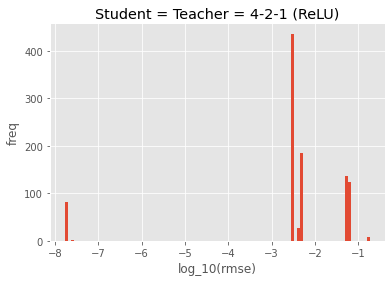

In [4]:
plt.title("Student = Teacher = 4-2-1 (ReLU)")

np.log10(df.test_rmse).hist(bins=100)
plt.xlabel("log_10(rmse)")
plt.ylabel("freq");

### Weight analysis

In [5]:
#TODO: Be able to programatically load the weights of runs using tmp files